In [1]:
import pandas as pd

df = pd.read_csv("comments.csv")
df

,comments,tagging
0,Get fucking real dude.,1
1,She is as dirty as they come and that crook ...,1
2,why did you fuck it up. I could do it all day...,1
3,Dude they dont finish enclosing the fucking s...,1
4,WTF are you talking about Men? No men thats n...,1
...,...,...
19996,I dont. But what is complaining about it goi...,0
19997,Bahah yeah i&;m totally just gonna&; get pis...,0
19998,hahahahaha >:) im evil mwahahahahahahahahaha,0
19999,What&;s something unique about Ohio? :),0


In [2]:
df.shape

(20001, 2)

In [3]:

df.isnull().sum()

comments    0
tagging     0
dtype: int64

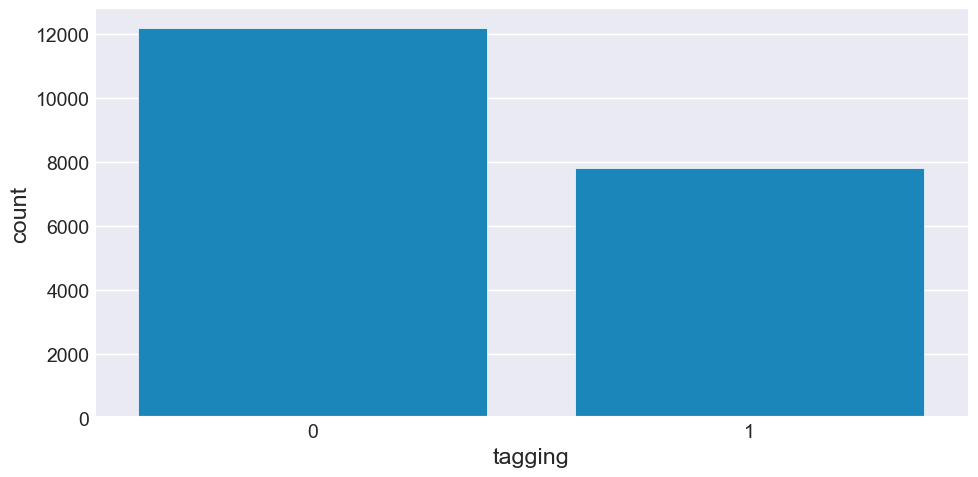

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use("fivethirtyeight")
sns.set_style("darkgrid")
sns.catplot(x="tagging", kind="count", data=df, height=5, aspect=2)

In [5]:
from unidecode import unidecode
import re


def remove_trash_characters(text : str):
    text = text.replace("\n", "")
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = re.sub(r'\s+', ' ', text)
    text = unidecode(text)
    text = text.lower()
    return text

In [6]:
df["comments"] =  df["comments"].apply(remove_trash_characters)
df

,comments,tagging
0,get fucking real dude,1
1,she is as dirty as they come and that crook r...,1
2,why did you fuck it up i could do it all day ...,1
3,dude they dont finish enclosing the fucking s...,1
4,wtf are you talking about men no men thats no...,1
...,...,...
19996,i dont but what is complaining about it going...,0
19997,bahah yeah im totally just gonna get pissed a...,0
19998,hahahahaha im evil mwahahahahahahahahaha,0
19999,whats something unique about ohio,0


In [7]:
def remove_laughts(texto):
    new_text = []
    texto = texto.split(" ")

    for word in texto:
        if "kkk" not in word and "haha" not in word and "ksks" not in word and "rsrs" not in word and "hehe" not in word and "hihi" not in word:
            new_text.append(word)
    return " ".join(new_text)

In [8]:
df["comments"] =  df["comments"].apply(remove_laughts)

In [9]:
import nltk
from nltk.corpus import stopwords

nltk.download("stopwords")
stopwords = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gusta\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
def remove_stopwords(text):
    sentence = nltk.word_tokenize(text)
    sentence_remove = [word for word in sentence if word not in stopwords]
    return " ".join(sentence_remove)

In [11]:
df["comments"] =  df["comments"].apply(remove_stopwords)

In [12]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [13]:
def Lemmatize(text):
    text = str(text)
    text_lemmatized = []
    text_tokenize = nlp(text)
    for token in text_tokenize:
        text_lemmatized.append(token.lemma_)
    return " ".join(text_lemmatized)


In [14]:
df["comments"] = df["comments"].apply(Lemmatize)

In [15]:
df["comments"] = df["comments"].apply(lambda x: str(x).lower())

In [16]:
df

,comments,tagging
0,get fucking real dude,1
1,dirty come crook rengel dem fuck corrupt joke ...,1
2,fuck could day let hour ping later sche writin...,1
3,dude do not finish enclose fucking shower hate...,1
4,wtf talk man man that s menage that s gay,1
...,...,...
19996,do not complain go,0
19997,bahah yeah i m totally go to get pissed talk m...,0
19998,i m evil,0
19999,what s something unique ohio,0


In [17]:
df.to_csv("DadosTratados.csv", index=False)
df = pd.read_csv("DadosTratados.csv")

,comments,tagging
0,get fucking real dude,1
1,dirty come crook rengel dem fuck corrupt joke ...,1
2,fuck could day let hour ping later sche writin...,1
3,dude do not finish enclose fucking shower hate...,1
4,wtf talk man man that s menage that s gay,1
...,...,...
19996,do not complain go,0
19997,bahah yeah i m totally go to get pissed talk m...,0
19998,i m evil,0
19999,what s something unique ohio,0


In [18]:
import numpy as np
df = df.dropna(subset=['comments'])

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df["comments"], df["tagging"], test_size=0.3, random_state=42)

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
TFIDFvectorizer = TfidfVectorizer()

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

steps =[
    ("tfidf", TfidfVectorizer()),
    ("classifier", RandomForestClassifier())
]

In [22]:
pipeline = Pipeline(steps)
pipeline.fit(X_train, y_train)


Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', RandomForestClassifier())])

In [25]:
score = pipeline.score(X_test, y_test) 
print(f"accurracy -  {score * 100:.2f}%")

accurracy -  90.78%
